In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv(r"C:\Users\Ramdhan\Desktop\DLCVNLP\TensorFlow\Home Work\Salary_Forcast\adult.data",sep=',',
                 names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary'])

In [3]:
df['salary'] = np.where(df['salary']==' <=50K',0,1)

In [4]:
X=df.drop('salary',axis="columns")
y=df['salary']

In [5]:
#Applying Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X.loc[:,['workclass','education','marital-status','occupation','relationship','race','sex','native-country']]=\
X.loc[:,['workclass','education','marital-status','occupation','relationship','race','sex','native-country']].apply(le.fit_transform)


In [6]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=2)

In [7]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=20)

In [8]:
model.fit(train_x,train_y)
model.score(test_x,test_y)


0.8517040221062327

In [9]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.15054
Feature: 1, Score: 0.03903
Feature: 2, Score: 0.16912
Feature: 3, Score: 0.03535
Feature: 4, Score: 0.08655
Feature: 5, Score: 0.07245
Feature: 6, Score: 0.06880
Feature: 7, Score: 0.09840
Feature: 8, Score: 0.01404
Feature: 9, Score: 0.01053
Feature: 10, Score: 0.12152
Feature: 11, Score: 0.03292
Feature: 12, Score: 0.08314
Feature: 13, Score: 0.01760


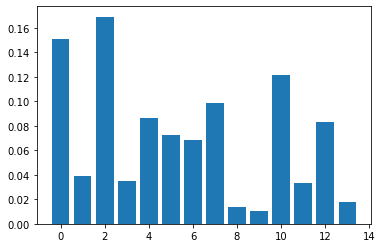

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [11]:
#pip install matplotlib

y_pred = model.predict(test_x)

In [12]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2444
           1       0.75      0.60      0.67       813

    accuracy                           0.85      3257
   macro avg       0.82      0.77      0.79      3257
weighted avg       0.85      0.85      0.85      3257



In [13]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(test_y, y_pred)
print(cm)

[[2285  159]
 [ 324  489]]


Text(69.0, 0.5, 'Truth')

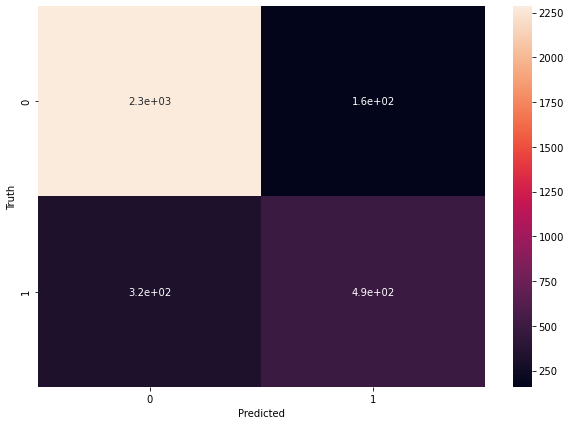

In [14]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [15]:
#pip install seaborn

In [16]:
y_pred
f = pd.DataFrame(y_pred,columns=['result'])

In [17]:
f[f['result']==1]

,result
5,1
6,1
8,1
16,1
17,1
...,...
3227,1
3231,1
3233,1
3237,1


In [32]:
test_x.iloc[:5]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
16054,42,7,160369,11,9,4,11,1,4,1,0,0,40,39
32382,44,2,150171,11,9,0,1,4,4,0,0,0,40,39
10749,39,2,256997,9,13,2,3,0,4,1,0,0,40,39
15377,39,4,147548,11,9,2,3,0,4,1,0,0,40,39
29660,29,1,106179,15,10,4,10,1,4,0,0,1408,40,39


In [33]:
t1= df[df['salary']==1].head(5)
t1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1


In [34]:
t2=t1.drop('salary',axis='columns')

In [35]:
#Applying Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
t2.loc[:,['workclass','education','marital-status','occupation','relationship','race','sex','native-country']]=\
t2.loc[:,['workclass','education','marital-status','occupation','relationship','race','sex','native-country']].apply(le.fit_transform)


In [36]:
t2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
7,52,1,209642,1,9,0,0,0,2,1,0,0,45,1
8,31,0,45781,2,14,1,1,1,2,0,14084,0,50,1
9,42,0,159449,0,13,0,0,0,2,1,5178,0,40,1
10,37,0,280464,3,10,0,0,0,1,1,0,0,80,1
11,30,2,141297,0,13,0,1,0,0,1,0,0,40,0


In [37]:
result = model.predict(t2)

In [38]:
result

array([0, 1, 1, 0, 0])